In [420]:
from minisom import MiniSom
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

## Przygotowanie danych

In [421]:
wine = fetch_ucirepo(id=109) 

X = wine.data.features 
y = wine.data.targets

### 1) Sprawdzenie zawartości


In [422]:
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [423]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [424]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


### 2) Podział na zbiory
Zbiór danych jest mały, co zmniejsza pewność związaną z poprawną oceną modelu przy tradycyjnym, jednokrotnym podziale zbioru na treningowy i testowy. Z tego powodu szczególnie wskazane jest użycie k-fold cross validation. W tym przypadku pozostałem przy standardowym podziale danych 80/20, czyli k = 5 (metoda ta jest wykorzystywana później).

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### 3) Normalizacja
W uczeniu SOM istotne są dystanse liczone w przestrzeni zdefiniowanej przez wartości atrybutów. W związku z tym, atrybuty, które mają znacząco większe przedziały wartości są w stanie zdominować pozostałe z mniejszymi przedziałami, co negatywnie wypłwa na cały prcoes. Rozwiązaniem jest normalizacja. Za pomocą MinMaxScaler przekształcam dane, żeby miały zakres od 0 do 1. Metoda ta zachowuje względny dystans między danymi i zdaje się być najczęściej stosowana w kontekście SOM.
Należy pamiętać, aby normalizować dane po ich rozdzieleniu. Inaczej może dojść do 'przecieku' informacji między zbiorem testowym a treningowym, co zmniejsza wiarygodność ocen modelu.

In [427]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [428]:
print(X_train)

[[0.59210526 0.17786561 0.79569892 ... 0.49593496 0.56981132 0.48666128]
 [0.71052632 0.15019763 0.72043011 ... 0.57723577 0.54339623 0.81406629]
 [0.62105263 0.20355731 0.67741935 ... 0.35772358 0.73584906 0.74130962]
 ...
 [0.65263158 0.20948617 0.69354839 ... 0.50406504 0.60377358 0.66046888]
 [0.50789474 0.53557312 0.53225806 ... 0.16260163 0.18113208 0.32093775]
 [0.48684211 0.44466403 0.55913978 ... 0.21138211 0.05660377 0.20371867]]


In [429]:
print(X_test)

[[ 0.80789474  0.28063241  0.50537634  0.3814433   0.38043478  0.67931034
   0.87647059  0.18        0.62025316  0.38139932  0.62601626  0.71698113
   0.99595796]
 [ 0.38947368  0.09881423  0.47849462  0.3556701   0.16304348  0.35172414
   0.07058824  0.94        0.26265823  0.35580205  0.2195122   0.09056604
   0.30072757]
 [ 0.74736842  0.22924901  0.77419355  0.45360825  0.40217391  0.67931034
   0.77352941  0.48        0.42405063  0.27474403  0.62601626  0.80377358
   0.51495554]
 [ 0.13947368  0.25889328  1.00537634  0.92268041  0.5326087   0.75862069
   1.39411765  0.68        0.45886076  0.40273038  0.36585366  0.91320755
   0.15117219]
 [ 0.69473684  0.10079051  0.30107527  0.3814433   0.26086957  0.3862069
   0.42647059  0.38        0.09810127  0.21501706  0.6097561   0.4490566
   0.28455942]
 [ 0.73684211  0.1798419   0.66666667  0.34020619  0.26086957  0.50689655
   0.77941176  0.18        0.59177215  0.36860068  0.61788618  0.79245283
   0.79789814]
 [ 0.79736842  0.2786561

Aby kod działał poprawnie należy pamiętać, żeby zbiory były typu numpy.ndarray.

In [430]:
y_train = y_train["class"].values
y_test = y_test["class"].values

In [431]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Struktura i uczenie sieci

### Parametry 
- x: kolumny (neurony)
- y: wiersze (neurony)
- iteracje (t)
- input_len: ilość atrybutów dla każdego wektora na wejściu
- sigma: promień sąsiedztwa, wpływa na szybkość uczenia się sąsiednich neuronów w każdej iteracji
    - sigma(t) = sigma / (1 + t/T), gdzie T = #num_iteration/2)
- learning_rate: współczynnik uczenia
    - learning_rate(t) = learning_rate / (1 + t/T), gdzie T = #num_iteration/2
- decay_function: funkcja, która kontroluje, jak zmniejsza się sigma i learning_rate podczas uczenia się sieci.
    - learning_rate / (1+t/(max_iterarations/2)).
- neighborhood_function: funkcja sąsiedztwa (domyślnie: 'gaussian')
- topology: topologia mapy (domyślnie: 'rectangular')
- activation_distance: sposób obliczania dystansu między danymi wejściowymi a neuronem (domyślnie metryka euklidesowa)

### Proces uczenia
MiniSom oferuje dwie metody inicjalizacji wag:
- random_weights_init: inicjalizuje wagi neuronów losowymi wartościami z zakresu ustalonego na podstawie danych wejściowych.
- pca_weights_init: inicjalizacja w przeciwieństwie do poprzedniej metody nie jest losowa i zapewnia lepszą zbieżność procesu uczenia.

MiniSom oferuje dwie metody uczenia:
- train_random: wybierane są losowe próbki danych
- train_batch: dane są wybierane w kolejności w jakiej są przechowywane

W poprzednich wersjach stosowałem random_weights_init, ale ostatecznie doszedłem do wniosku, że pca_weights_init da lepsze rezultaty.

### Początkowa konfiguracja
Heurystyka: M ≈ 5 sqrt(N), gdzie M to liczba neuronów, a N liczba obserwacji.

Sigma musi być odpowiednia do rozmiarów mapy (sigma < x/2 i sigma < y/2). Nie znalazłem konkretnych wskazówek jak wybrać jak najlepszą wartość learning rate, początkowo zdecydowałem się wybrać zbliżoną do tych wartości, które widziałem w użyciu (0.5). Co do pozostałych własności SOM, to zostałem przy domyślnych atrybutach.

## Minimalizacja błędów
Dopasowując sieć do danych skupiłem sie na dwóch metrykach: quantization_error i topographic_error.

topographic_error: miara jak dobrze struktura danych została zachowana na mapie. Liczona jako ilość obserwacji, w których najlepiej pasujący element nie jest sąsiadem drugiego najlepiej pasującego elementu. Przyjmuje wartości od 0 (wszystkie wspomniane elementy są sąsiadami) do 1 (wspomniane elementy nie sąsiadują ze sobą). Im niższa wartość tym lepiej.

quantization_error: średni dystans od elementów wejściowych do odpowiadającym im wygranym neuronom. Zmniejsza się wraz ze zwiększaniem się mapy, więc nie może służyć do porównywania map o różnych rozmiarach, co oznacza, że rozmiar mapy powinien pozostać stały.

Poniżej widzimy, jak oba te błędy zmniejszają się wraz z kolejnymi iteracjami. Świadczy to dobrze o zbieżności modelu i ułatwia wybranie odpowiedniejszej maksymalnej ilości iteracji (zdecydowałem się na 8000). Na każdym wykresie widzimy SOM z innym learning_rate. Im wyższa jego wartość, tym wykresy są bardziej poszarpane, ale zbieżność wydaje się być podobna. Niemniej jednak dla learning_rate = 0.2 sieć wydaje się mieć lepszy topographic_error i zdaje się lepiej uczyć, więc postanowiłem przejść na tę wartość.

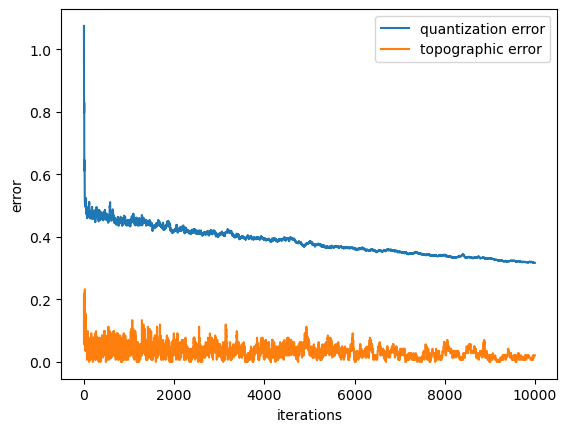

0.34281314291831694
0.04929577464788732


In [432]:
som = MiniSom(8, 8, X_train.shape[1], sigma=2., learning_rate=.5,
              neighborhood_function='gaussian', random_seed=42, topology='rectangular')

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_train))
    som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_train))
    t_error.append(som.topographic_error(X_train))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iterations')
plt.legend()
plt.show()

print(q_error[8000])
print(t_error[8000])

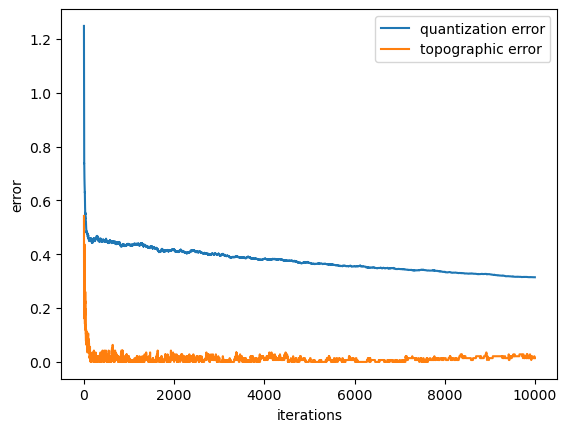

0.3341605296257656
0.014084507042253521


In [433]:
som = MiniSom(8, 8, X_train.shape[1], sigma=2., learning_rate=.2,
              neighborhood_function='gaussian', random_seed=42, topology='rectangular')

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_train))
    som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_train))
    t_error.append(som.topographic_error(X_train))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iterations')
plt.legend()
plt.show()

print(q_error[8000])
print(t_error[8000])

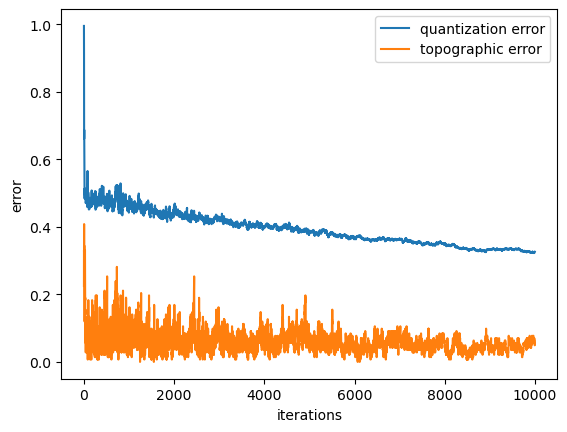

0.35172280929140254
0.04225352112676056


In [434]:
som = MiniSom(8, 8, X_train.shape[1], sigma=2., learning_rate=.8,
              neighborhood_function='gaussian', random_seed=42, topology='rectangular')

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_train))
    som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_train))
    t_error.append(som.topographic_error(X_train))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iterations')
plt.legend()
plt.show()

print(q_error[8000])
print(t_error[8000])

In [435]:
from math import sqrt, ceil

# Ustawienie hiperparametrów
N = X_train.shape[0]
M = 5*sqrt(N)
x_size = ceil(sqrt(M))
y_size = ceil(sqrt(M))
input_len = X_train.shape[1]
sigma = 2.0
learning_rate = 0.2
iterations = 8000

print('x_size:', x_size)
print('y_size:', y_size)
print('input_len: ', input_len)

x_size: 8
y_size: 8
input_len:  13


In [436]:
som = MiniSom(x_size, y_size, input_len, sigma, learning_rate, random_seed=10)

som.pca_weights_init(X_train)
som.train_random(data = X_train, num_iteration = iterations)

print(som.quantization_error(X_train))
print(som.topographic_error(X_train))

0.3171927967130989
0.007042253521126761


Poniższa funkcja klasyfikuje dane do etykiety przypisanej do zwycięskiego neuronu. Etykieta jest przypisywana do neuronu, jeśli większość próbek odwzorowanych w tym neuronie ją posiada. Funkcja przypisze najczęstszą etykietę w zbiorze danych w przypadku, gdy próbka jest mapowana na neuron do którego nie jest przypisana żadna klasa.

In [437]:
def classify(som, data):
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)

    return result

### Miary klasyfikacji

- Accuracy: ułamek poprawnie sklasyfikowanych obiektów
- Precision: True Positive / (True Positive + False Positive).
- Recall: True Positives / (True Positive + False Negatives).
- F1 Score: ważona średnia harmoniczna precyzji i czułości. Im bliżej 1, tym lepszy model.

Support informuje nas, ile obserwacji należało do każdej klasy w zbiorze testowym. Macro avg to średnia precyzji, czułości i F1-score dla wszystkich klas, a weighted avg to ważona średnia precyzji, czułości i F1-score, biorąc pod uwagę liczbę instancji dla każdej klasy.

Jak widać poniżej model osiąga przy obecnej metodzie testowanie całkiem dobre wyniki.

In [438]:
print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.93      0.93      0.93        14
           3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### K-Fold Cross Validation

Poniżej znajduje się sprawdzenie zbioru za pomocą wspomnianej metody. Do ostatecznego uczenia modelu użyłbym train_random, gdyż na ogół daje lepsze rezultaty, ale żeby dobrze porównać poszczególne wersje używam train_batch.

In [439]:
from sklearn.model_selection import StratifiedKFold
X_array = X.to_numpy()
y_array = y["class"].values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [440]:
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

scaler = MinMaxScaler()

for train_index, test_index in skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    som.pca_weights_init(X_train)
    som.train_batch(data=X_train, num_iteration=iterations)

    y_pred = np.array(classify(som, X_test))
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)

    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    accuracy_list.append(report['accuracy'])

mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_accuracy = np.mean(accuracy_list)

print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1-score: {mean_f1}')
print(f'Mean Accuracy: {mean_accuracy}')

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.92      0.79      0.85        14
           3       0.90      0.90      0.90        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy        

### Funkcja rysująca U-Matrix
Poniższa funkcja rysuje SOM w postaci U-Matrix. Neurony są przedstawione jako tablica komórek, kolor reprezentuje dystans od sąsiednich neuronów (im jaśniej tym bliżej siebie są neurony). W komórki wpisane są znaczniki reprezentujące jak dane 'mapują' się na sieć. Im mniej nakładających się znaczników tym lepiej - świadczy to o lepszym pogrupowaniu danych.

In [441]:
def plot_som(som, X_train, y_train):
    plt.figure(figsize=(9, 9))

    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()

    markers = ['o', 's', 'D']
    colors = ['r','g','b']
    for cnt, xx in enumerate(X_train):
        w = som.winner(xx)
        plt.plot(w[0] + 0.5, w[1] + 0.5, markers[int(y_train[cnt]) - 1], markerfacecolor='None',
                 markeredgecolor=colors[int(y_train[cnt]) - 1], markersize=12, markeredgewidth=2)

    plt.show()

Poniżej wyraźnie zarysowały się trzy odrębne rejony, w których dominują określone typy win.

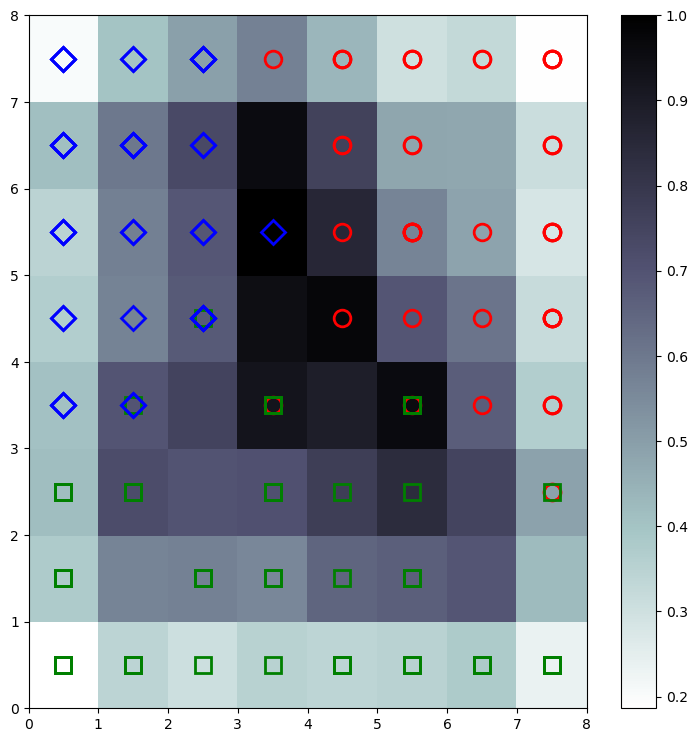

In [442]:
plot_som(som, X_train, y_train)

## Optymalizacja
Używam tutaj biblioteki hyperopt. Dobór parametrów odbywa się na podstawie szukania najmniejszej wartości określonego przez nas błędu. Wykorzystywane jest do tego Bayesian optimization.

In [445]:
from hyperopt import fmin, tpe, hp

In [446]:
print(som.quantization_error(X_train))
print(som.topographic_error(X_train))

0.3454629133420297
0.02097902097902098


## Minimalizacja wskaźnika błędu poprzez dostrajanie parametru sigma
Ostatecznie po wielu próbach otrzymane wartości sigma nie wpływały znacząco na quantization_error i topographic_error. Nie polepszały też mocno ani accuracy, ani innych miar klasyfikacji. Ilość iteracji w szukaniu najlepszej wartości powyżej 500 nie przynosiła już praktycznie żadnych zmian. Poniżej przedstawiłem po jednym przykładzie dla zmniejszenia każdego ze wspomnianych błędów.

### quantization_error

In [447]:
best = fmin(fn=lambda sig: MiniSom(x_size, y_size, input_len, sigma=sig, learning_rate=learning_rate, random_seed=10).quantization_error(X_train),
           space=hp.uniform("sig", 0.001, x_size / 2.01),
           algo=tpe.suggest,
           max_evals=500)
print(best)

100%|██████████| 500/500 [00:01<00:00, 309.55trial/s, best loss: 1.3584482184812372]
{'sig': 2.9292801595887323}


In [448]:
sig = best['sig']

som = MiniSom(x_size, y_size, input_len, sigma=sig, learning_rate=learning_rate, random_seed=10)

som.pca_weights_init(X_train)
som.train_random(data = X_train, num_iteration = iterations)

print(som.quantization_error(X_train))
print(som.topographic_error(X_train))

0.384756107167493
0.013986013986013986


In [449]:
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

scaler = MinMaxScaler()

for train_index, test_index in skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    som.pca_weights_init(X_train)
    som.train_batch(data=X_train, num_iteration=iterations)

    y_pred = np.array(classify(som, X_test))
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)

    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    accuracy_list.append(report['accuracy'])

mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_accuracy = np.mean(accuracy_list)

print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1-score: {mean_f1}')
print(f'Mean Accuracy: {mean_accuracy}')

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93        14
           3       1.00      0.90      0.95        10

    accuracy        

### topographic_error

In [450]:
best = fmin(fn=lambda sig: MiniSom(x_size, y_size, input_len, sigma=sig, learning_rate=learning_rate, random_seed=10).topographic_error(X_train),
           space=hp.uniform("sig", 0.001, x_size / 2.01),
           algo=tpe.suggest,
           max_evals=500)
print(best)

100%|██████████| 500/500 [00:01<00:00, 274.11trial/s, best loss: 0.965034965034965]
{'sig': 3.3549983281519897}


In [451]:
sig = best['sig']

som = MiniSom(x_size, y_size, input_len, sigma=sig, learning_rate=learning_rate, random_seed=10)

som.pca_weights_init(X_train)
som.train_random(data = X_train, num_iteration = iterations)

print(som.quantization_error(X_train))
print(som.topographic_error(X_train))

0.3979628291827864
0.0


In [452]:
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

scaler = MinMaxScaler()

for train_index, test_index in skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    som.pca_weights_init(X_train)
    som.train_batch(data=X_train, num_iteration=iterations)

    y_pred = np.array(classify(som, X_test))
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)

    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    accuracy_list.append(report['accuracy'])

mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_accuracy = np.mean(accuracy_list)

print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1-score: {mean_f1}')
print(f'Mean Accuracy: {mean_accuracy}')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      0.93      0.93        14
           3       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.74      1.00      0.85        14
           3       1.00      0.50      0.67        10

    accuracy        